# CIFAR-10 Image Classification
* The full form of CIFAR is  Canadian Institute For Advanced Research
* The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.
* The class labels and their standard associated integer values are listed below:
  * 0: airplane
  * 1: automobile
  * 2: bird
  * 3: cat
  * 4: deer
  * 5: dog
  * 6: frog
  * 7: horse
  * 8: ship
  * 9: truck

CIFAR-10 is a set of images that can be used to teach a model how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works.

### Importing the Important libraries and Framework

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,MaxPooling2D,Conv2D
from keras.datasets import cifar100
                  

### Loading the Dataset and Spliting into Train and Test

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

* The Train Dataset contain 50000 images and Test dataset contain 10000 images.
* The 32 X 32 is the resolution of an image. Where 32 is width and 32 is height.
* And 3 is the RGB (Red, Green, Blue) color code.

### Exploring the Dataset

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(index):                 #Through this funcn we can see the ouput image in training dataset
    plt.figure(figsize = (15,3))
    plt.imshow(x_train[index])
    plt.title(classes[y_train[index][0]])
    plt.axis('off')

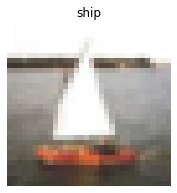

In [6]:
plot_sample(860)

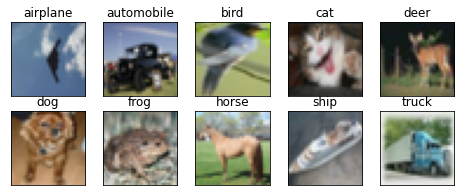

In [7]:
fig = plt.figure(figsize = (8,3))
for i in range(len(classes)):
    ax = fig.add_subplot(2,5,1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[ : ] == i)[0]
    feat = x_train[idx,::]
    img_number = np.random.randint(feat.shape[0])
    im = (feat[img_number,::])
    ax.set_title(classes[i])
    plt.imshow(im)
plt.show()

In [8]:
np.where(y_train[ : ]==9)[1]

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
x_train[1,::].shape

(32, 32, 3)

In [10]:
x_train[1].shape

(32, 32, 3)

### Encoding Target Variable

In [11]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

### Create the Model

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes)))
model.add(Activation('softmax'))


### Train the Neural Network

In [13]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255          # Normalize 
x_test/=255


In [14]:
model_hist = model.fit(x_train,y_train,
          batch_size=32,
          epochs=80,
          validation_data=(x_test,y_test),
          shuffle=True)

Epoch 1/80
1563/1563 [==============================] - 10s 5ms/step - loss: 8.1356 - accuracy: 0.3070 - val_loss: 6.2172 - val_accuracy: 0.3935
Epoch 2/80
1563/1563 [==============================] - 7s 5ms/step - loss: 4.8976 - accuracy: 0.4471 - val_loss: 3.8876 - val_accuracy: 0.4834
Epoch 3/80
1563/1563 [==============================] - 7s 5ms/step - loss: 3.1974 - accuracy: 0.5087 - val_loss: 2.5916 - val_accuracy: 0.5452
Epoch 4/80
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2727 - accuracy: 0.5534 - val_loss: 1.9554 - val_accuracy: 0.5791
Epoch 5/80
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7548 - accuracy: 0.5900 - val_loss: 1.5821 - val_accuracy: 0.6070
Epoch 6/80
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4541 - accuracy: 0.6212 - val_loss: 1.3518 - val_accuracy: 0.6355
Epoch 7/80
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2646 - accuracy: 0.6520 - val_loss: 1.2054 - val_accuracy

### Plotting Accuracy

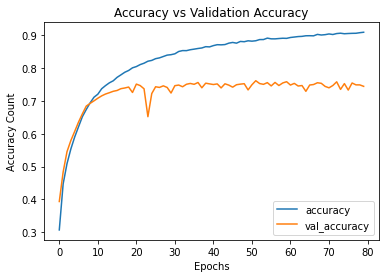

In [17]:
plt.plot(model_hist.history['accuracy'], label='accuracy')
plt.plot(model_hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Count')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

### Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Saving the Model for future prediction

In [ ]:
model.save('/content/drive/MyDrive/College Training 6th Sem/model.h5')